In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pandas as pd

In [9]:
df=pd.read_table("prot_cap.csv")

In [10]:
df.head()

,frame.number,frame.time,frame.time_relative,ip.proto,ip.src,udp.srcport,tcp.srcport,ip.dst,udp.dstport,tcp.dstport,frame.len
0,1,"Apr 25, 2006 05:58:54.624365001 CDT",0.000000,17,192.168.62.121,32917,NaN,227.111.1.3,12345,NaN,1358
1,2,"Apr 25, 2006 05:58:54.624484002 CDT",0.000119,17,192.168.62.121,32915,NaN,227.111.1.1,12345,NaN,1358
2,3,"Apr 25, 2006 05:58:54.624692003 CDT",0.000327,17,192.168.62.121,32916,NaN,227.111.1.2,12345,NaN,1358
3,4,"Apr 25, 2006 05:58:54.624911004 CDT",0.000546,17,192.168.62.121,32920,NaN,227.111.1.4,12345,NaN,1358
4,5,"Apr 25, 2006 05:58:54.625132000 CDT",0.000767,17,192.168.62.121,32923,NaN,227.111.1.6,12345,NaN,1358


In [11]:
df["frame.number"].describe()

count    13519.000000
mean      6760.000000
std       3902.743479
min          1.000000
25%       3380.500000
50%       6760.000000
75%      10139.500000
max      13519.000000
Name: frame.number, dtype: float64

In [26]:
# Nanosecond and timezone support!! Nice!
df["frame.dt"] = df["frame.time"].apply(lambda x: pd.to_datetime(x, format="%b %d, %Y %H:%M:%S.%f %Z"))
#df["frame.dt"] = df["frame.time"].apply(lambda x:np.datetime64(x[:-4]))
df["frame.dt"].head()
df["frame.dt"].iloc[1]

Timestamp('2006-04-25 05:58:54.624484002')

In [25]:
dft = df.set_index("frame.dt")
dft.head()

,frame.number,frame.time,frame.time_relative,ip.proto,ip.src,udp.srcport,tcp.srcport,ip.dst,udp.dstport,tcp.dstport,frame.len
frame.dt,,,,,,,,,,,
2006-04-25 05:58:54.624365001,1,"Apr 25, 2006 05:58:54.624365001 CDT",0.000000,17,192.168.62.121,32917,NaN,227.111.1.3,12345,NaN,1358
2006-04-25 05:58:54.624484002,2,"Apr 25, 2006 05:58:54.624484002 CDT",0.000119,17,192.168.62.121,32915,NaN,227.111.1.1,12345,NaN,1358
2006-04-25 05:58:54.624692003,3,"Apr 25, 2006 05:58:54.624692003 CDT",0.000327,17,192.168.62.121,32916,NaN,227.111.1.2,12345,NaN,1358
2006-04-25 05:58:54.624911004,4,"Apr 25, 2006 05:58:54.624911004 CDT",0.000546,17,192.168.62.121,32920,NaN,227.111.1.4,12345,NaN,1358
2006-04-25 05:58:54.625132000,5,"Apr 25, 2006 05:58:54.625132000 CDT",0.000767,17,192.168.62.121,32923,NaN,227.111.1.6,12345,NaN,1358


In [64]:
# Find all conversations
# Potential example
# Addr_A, Port_A, Addr_B, Port_B, total_packets, total_bytes, bytes A=>B, bytes B=>A, Max_ms_per_sec_burst A=>B, Max_ms_per_sec_burst B=>A

print (df["ip.proto"].unique())

def get_conv_id(row, return_id):
    sip = row["ip.src"]
    try:
        is_udp = int(row["ip.proto"]) == 17
    except:
        return None
    if is_udp:
        sport = row ["udp.srcport"]
    else:
        sport = row["tcp.srcport"]
        
    tip= row["ip.dst"]
    if is_udp:
        tport = row ["udp.dstport"]
    else:
        tport = row["tcp.dstport"]
        
#         soucre=123
#         target =345
#         source2 = 987
#         target2 = 765
#         123:port-234:port
                
#         if soucre=345
#         target=123
#         then the if codtition is true
#         because 123<345
#         so then i reverse sourcfe and target
#         so the ide is agian
#         123:port-234:port
    direction="a->b"
    if tip==sip:
        if tport<sport:
            direction="b->a"
            tmp=sport
            sport=tport
            tport=tmp
    elif tip<sip:
        direction="b->a"
        tmp=sip
        sip=tip
        tip=tmp
        tmp=sport
        sport=tport
        tport=tmp

    else:
        pass
    conv_id = "{}:{}-{}:{}".format(sip,int(sport),tip,int(tport))
    if return_id:
        return conv_id
    else:
        return direction
    
dft["conv"] = dft.apply(lambda x:get_conv_id(x,True),axis=1)
dft["conv_dir"] = dft.apply(lambda x:get_conv_id(x,False),axis=1)


#print(df[["conv","conv_dir"]][:25])
grpd = dft.groupby("conv")
framelen_per_convo = grpd["frame.len"].sum()
#started = grpd["frame.dt"].min()
#ended = grpd["frame.dt"].max()
#print(framelen_per_convo)
#print(len(framelen_per_convo))
#print(started)
#ended-started
bytes_per_dir = dft.groupby(["conv","conv_dir"])["frame.len"].sum()
bytes_per_dir.order(inplace=True, ascending=False)
print(bytes_per_dir)
    

[ 17.   6.  nan]
conv                                     conv_dir
192.168.62.121:32915-227.111.1.1:12345   a->b        3686970
192.168.62.121:32917-227.111.1.3:12345   a->b        3481912
192.168.62.121:32921-227.111.1.5:12345   a->b        3384136
192.168.62.121:32923-227.111.1.6:12345   a->b        3287718
192.168.62.121:32920-227.111.1.4:12345   a->b        2748592
192.168.62.121:32916-227.111.1.2:12345   a->b        1351210
10.100.100.100:2834-192.168.62.121:5901  b->a          29511
10.100.100.100:4610-192.168.62.121:22    b->a           7428
192.168.62.121:32927-192.168.62.2:53     b->a           6935
10.100.100.100:2834-192.168.62.121:5901  a->b           5360
192.168.62.121:32927-192.168.62.2:53     a->b           4063
192.168.62.95:6-236.0.0.0:6              a->b           1275
10.100.100.100:4615-192.168.62.121:22    b->a            722
10.100.100.100:4610-192.168.62.121:22    a->b            438
192.168.62.249:137-192.168.62.255:137    a->b            368
192.168.62.188:137

/Users/qavila/.pyenv/versions/3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:75: FutureWarning: order is deprecated, use sort_values(...)


In [65]:
grpd2 = df.groupby(["conv","conv_dir"])
#print (grpd2.apply(lambda df:1000*df["frame.len"].resample("L", how="sum") * 8.0 ))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [43]:
#Filter on Conversation for bps and max ms burst

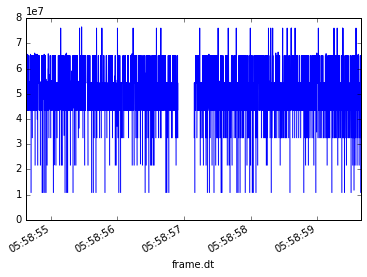

In [29]:
# Frequency resample flags"L" millisecond "U" microsecond
bits_per_second_per_ms =  1000*dft["frame.len"].resample("L", how="sum") * 8.0
# myslice = bits_per_second_per_ms[910:925]
bits_per_second_per_ms.plot()
# myslice.plot()

In [30]:
# Spikes
print(bits_per_second_per_ms.max())
spikes = bits_per_second_per_ms[bits_per_second_per_ms>70000000]
print(spikes)
#Need to review getting all conversations for burst intervals

76528000.0
frame.dt
2006-04-25 05:58:55.146    76048000
2006-04-25 05:58:55.430    76048000
2006-04-25 05:58:55.461    76528000
2006-04-25 05:58:55.685    76048000
2006-04-25 05:58:55.765    76048000
2006-04-25 05:58:55.766    76048000
2006-04-25 05:58:56.000    76048000
2006-04-25 05:58:56.235    76048000
2006-04-25 05:58:56.586    76048000
2006-04-25 05:58:56.652    76048000
2006-04-25 05:58:57.236    76048000
2006-04-25 05:58:57.513    76048000
2006-04-25 05:58:57.665    76048000
2006-04-25 05:58:57.786    76048000
2006-04-25 05:58:57.997    76048000
2006-04-25 05:58:58.270    76048000
2006-04-25 05:58:58.304    76048000
2006-04-25 05:58:58.331    76048000
2006-04-25 05:58:58.333    76048000
2006-04-25 05:58:58.483    76048000
2006-04-25 05:58:58.551    76048000
2006-04-25 05:58:58.611    76048000
2006-04-25 05:58:58.616    76048000
2006-04-25 05:58:58.670    76048000
2006-04-25 05:58:59.020    76048000
2006-04-25 05:58:59.255    76048000
2006-04-25 05:58:59.303    76048000
2006-04-

In [13]:
# Definable Directional lists. ie.

In [18]:
#Quick time test
#http://pandas.pydata.org/pandas-docs/stable/gotchas.html
begin = pd.Timestamp.min

In [19]:
begin

Timestamp('1677-09-22 00:12:43.145225')

In [20]:
end = pd.Timestamp.max

In [21]:
end

Timestamp('2262-04-11 23:47:16.854775807')